In [2]:
words = open('Indian_Names.csv').read().splitlines()
newords = [word.split(',')[1] for word in words]
newords = newords[1:]
words = newords
words

['aabid',
 'aabida',
 'aachal',
 'aadesh',
 'aadil',
 'aadish',
 'aaditya',
 'aaenab',
 'aafreen',
 'aafrin',
 'aaftaab',
 'aaftab',
 'aagand',
 'aahim',
 'aajad',
 'aajiv',
 'aakanksha',
 'aakar',
 'aakas',
 'aakash',
 'aakib',
 'aalam',
 'aalina',
 'aaliya',
 'aamil',
 'aamin',
 'aamina',
 'aamir',
 'aamod',
 'aamosh',
 'aamrin',
 'aanad',
 'aanamika',
 'aanand',
 'aanchal',
 'aanik',
 'aanil',
 'aansi',
 'aansu',
 'aanya',
 'aaradhana',
 'aarati',
 'aarav',
 'aardhna',
 'aarif',
 'aarifa',
 'aarifun',
 'aarju',
 'aarti',
 'aarushi',
 'aas',
 'aasa',
 'aash',
 'aasha',
 'aashi',
 'aashia',
 'aashif',
 'aashik',
 'aashis',
 'aashish',
 'aashiya',
 'aashma',
 'aashu',
 'aasif',
 'aasim',
 'aasish',
 'aasma',
 'aasmin',
 'aastha',
 'aasto',
 'aasu',
 'aatam',
 'aatif',
 'aatikun',
 'aatir',
 'aavesh',
 'aayana',
 'aayesha',
 'aaysha',
 'aayush',
 'aazad',
 'aazadi',
 'abash',
 'abbal',
 'abbas',
 'abdul',
 'abdulla',
 'abdullah',
 'abha',
 'abhaki',
 'abhash',
 'abhay',
 'abhaysingh',
 

In [3]:
stoi = {chr(i+ord('a')):i+1 for i in range(26)}
stoi['.'] = 0
stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [4]:
itos = {val: key for key,val in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [5]:
import numpy as np
import torch

In [6]:
C = torch.randn((27,16))
C

tensor([[ 6.3752e-01,  2.6213e-03,  1.4740e+00,  1.4721e-01,  1.0053e-01,
          1.2815e+00,  9.8663e-01,  5.0358e-01,  9.4115e-01, -5.0571e-01,
         -1.7633e+00,  9.6312e-01, -5.0842e-01,  8.9683e-03,  4.4026e-01,
          4.4172e-01],
        [ 2.2739e+00, -8.5609e-01,  1.1246e+00,  8.1520e-01, -1.3253e+00,
         -7.8403e-01, -6.3830e-01,  1.9174e+00, -6.3694e-01,  3.3515e-01,
         -1.6344e+00,  5.2332e-01, -7.3500e-01, -1.0131e+00, -1.0928e-01,
         -2.1181e-01],
        [-2.8135e-01, -9.7059e-01,  1.9002e+00,  3.8136e-01,  9.5674e-01,
          5.4711e-01, -1.6660e+00,  6.8776e-02, -5.0848e-01, -1.6454e+00,
         -1.5790e+00,  2.4020e+00,  5.9122e-01, -1.1302e+00,  1.2713e-01,
         -1.3631e-01],
        [-7.5252e-02, -1.3489e+00, -5.1634e-01, -1.1411e+00,  6.3379e-01,
          8.2426e-01,  1.3307e+00, -2.4644e-01, -1.1319e-01,  3.6333e-01,
         -9.5452e-01,  7.3270e-01,  8.6277e-01,  1.2646e+00, -4.8542e-02,
         -6.7197e-01],
        [-4.4595e-01

In [7]:
block_size = 6
X, Y = [], []
# print(stoi)
for w in words:
  if(sum(stoi.get(ch,-1)==-1 for ch in w)!=0):
    continue
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    #print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append
  
X = torch.tensor(X)
Y = torch.tensor(Y)

In [8]:
def build_dataset(words):  
  X, Y = [], []
  for w in words:
    if(sum(stoi.get(ch,-1)==-1 for ch in w)!=0):
        continue
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([38043, 6]) torch.Size([38043])
torch.Size([4784, 6]) torch.Size([4784])
torch.Size([4738, 6]) torch.Size([4738])


In [9]:
emb = C[X]
emb.shape

torch.Size([47565, 6, 16])

In [10]:
import torch.nn.functional as F

In [11]:
ncnt = [96,100,27]
g = torch.Generator().manual_seed(123)
#weights and biases
w1 = torch.randn((ncnt[0],ncnt[1]),generator=g) * (5/3) / (ncnt[0]*ncnt[1])**0.5
# b1 = torch.randn(ncnt[1],generator=g) * 0.01
w2 = torch.randn((ncnt[1],ncnt[2]),generator=g) * 0.01
b2 = torch.randn(ncnt[2],generator=g) * 0

#batchnorm parameters
bngain = torch.ones((1,ncnt[1]))
bnbias = torch.zeros((1,ncnt[1]))
bnmean_running = torch.zeros((1,ncnt[1]))
bnstd_running = torch.ones((1,ncnt[1]))


parameters = [C,w1,w2,b2]

In [12]:
w1.shape

torch.Size([96, 100])

In [13]:
sum(p.nelement() for p in parameters)

12759

In [14]:
for p in parameters:
    p.requires_grad = True


In [15]:
losses = []
for i in range(20000):
    #getting the batch
    ix = torch.randint(0,Xtr.shape[0],(32,))


    #getting the vector which represents them
    emb = C[Xtr[ix]]


    #linear layer
    preh = emb.view(-1,ncnt[0]) @ w1

    #batchnorm layer
    bnmeani = preh.mean(0,keepdim=True)
    bnstdi = preh.std(0,keepdim=True)
    preh = bngain * (preh-bnmeani)/bnstdi + bnbias
    with torch.no_grad():
        bnmean_running = 0.999 * bnmean_running + 0.001 * bnmeani
        bnstd_running = 0.999 * bnstd_running + 0.001 * bnstdi



    #non linearity
    h = torch.tanh(preh)
    logits = h @ w2 + b2
    loss = F.cross_entropy(logits,Ytr[ix])


    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    
    #learning
    lr = 0.002 if i<10000 else 0.001
    for p in parameters:
        p.data += -lr*p.grad
    if(i%10000==0):
        print(f'{i:7d}/20000: {loss.item():.4f}')
    losses.append(loss.log10().item())
    # break

      0/20000: 3.2993


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

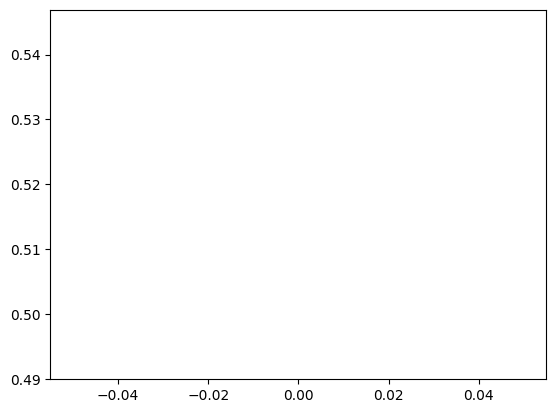

In [17]:
plt.plot(losses)

In [18]:
with torch.no_grad():
    emb = C[Xtr] 
    preh = emb.view(-1, ncnt[0]) @ w1 
    bnmean = preh.mean(0,keepdim=True)
    bnstd = preh.std(0,keepdim=True)

In [19]:
@torch.no_grad() 
def split_loss(split):
  x,y = {
    'train': (Xtr, Ytr),
    'val': (Xdev, Ydev),
    'test': (Xte, Yte),
  }[split]
  emb = C[x]
  embcat = emb.view(emb.shape[0], -1) 
  hpreact = embcat @ w1 
  #hpreact = bngain * (hpreact - hpreact.mean(0, keepdim=True)) / hpreact.std(0, keepdim=True) + bnbias
  hpreact = bngain * (hpreact - bnmean_running) / bnstd_running + bnbias
  h = torch.tanh(hpreact) 
  logits = h @ w2 + b2 
  loss = F.cross_entropy(logits, y)
  print(split, loss.item())

split_loss('train')
split_loss('val')

train 3.2938380241394043
val 3.2937850952148438


In [20]:
context = [0] * block_size
C[torch.tensor([context])].shape

torch.Size([1, 6, 16])

In [21]:
for _ in range(10):
    
    out = []
    context = [0]*block_size
    while True:
      emb = C[torch.tensor([context])] 
      preh = emb.view(1,-1) @ w1  
      preh = bngain * (preh - bnmean_running) / bnstd_running + bnbias
      h = torch.tanh(preh)
      logits = h @ w2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out)[:-1])


gjfiwutvcrmbe
aynaajzxzppwhgodwebupgdetpfv
n
xpxwrjyhdpjuqtjxhuqovhlypirvcgowiblnbibsvavoctnpntwr
nmrfhetukiirnnpyagicubhbnuhcypibqpdjhkdaksrwpfvzvm
czhtoawyuvlbfzkepwqphrssvjgkx
mjpxxf
caadgmmrmjmwrjswzzsekxgrviqokndihtsorhmcesovundzeyhrzopccwtfgbvelgowjohdbqkvdao
agexyvrgxgnysjdttpigggvmxyykdezetdjcgmxwjgffsrnlctapzsdmxdmjgjdtarkh


In [22]:
class Linear:
    def __init__(self,fan_in,fan_out,bias=True):
        self.weight = torch.randn((fan_in,fan_out)) / fan_in**0.5
        self.bias = torch.zeros(fan_out) if bias else None

    def __call__(self, x):
        self.out = x @ self.weight 
        if self.bias is not None:
            self.out += self.bias
        return self.out
    
    def parameters(self):
        return [self.weight]+([self.bias] if self.bias is not None else [])

class BatchNorm1D:

    def __init__(self,dim,eps=1e-5,momentum = 0.1):
        self.eps = eps
        self.momentum = momentum
        self.training = True
        self.gamma = torch.ones(dim)
        self.beta = torch.zeros(dim)
        self.running_mean = torch.zeros(dim)
        self.running_var = torch.ones(dim)
    
    def __call__(self,x):
        if self.training:
            xmean = x.mean(0,keepdim=True)
            xvar = x.var(0,keepdim=True)
        else: 
            xmean = self.running_mean
            xvar = self.running_var
        xout = (x - xmean) / torch.sqrt(xvar+self.eps)
        self.out = self.gamma * xout + self.beta
        if self.training:
            with torch.no_grad():
                self.running_mean = (1-self.momentum) * self.running_mean + self.momentum * xmean
                self.running_var = (1-self.momentum) * self.running_var + self.momentum * xvar
        return self.out
    
    def parameters(self):
        return [self.gamma,self.beta]

class Tanh:

    def __call__(self,x):
        self.out = torch.tanh(x)
        return self.out
    
    def parameters(self):
        return []
    
class Embedding:
    def __init__(self,vocab_size,dim):
        self.weight = torch.randn((vocab_size,dim))

    def __call__(self,ix):
        return self.weight[ix]
    
    def parameters(self):
        return [self.weight]

class Flatten:
    def __call__(self,x):
        return x.view(x.shape[0],-1)
    
    def parameters(self):
        return []
    
class Sequential:
    def __init__(self,layers):
        self.layers = layers

    def __call__(self,x):
        for layer in self.layers:
            x = layer(x)
        self.out = x
        return self.out
    
    def parameters(self):
        return [par for layer in self.layers for par in layer.parameters()]
    
    
ncnt = [96,200,27]
C = torch.randn((27,16))

model = Sequential([
    Embedding(27,16),
    Flatten(),
    Linear(ncnt[0],ncnt[1],False),BatchNorm1D(ncnt[1]),Tanh(),
    Linear(ncnt[1],ncnt[1],False),BatchNorm1D(ncnt[1]),Tanh(),
    Linear(ncnt[1],ncnt[1],False),BatchNorm1D(ncnt[1]),Tanh(),
    Linear(ncnt[1],ncnt[1],False),BatchNorm1D(ncnt[1]),Tanh(),
    Linear(ncnt[1],ncnt[1],False),BatchNorm1D(ncnt[1]),Tanh(),
    Linear(ncnt[1],ncnt[2],False),BatchNorm1D(27)
])

with torch.no_grad():
    model.layers[-1].gamma *= 0.1
    for layer in model.layers[:-1]:
        if isinstance(layer,Linear):
            layer.weight *= 5/3

parameters = model.parameters()
print(sum(p.nelement() for p in parameters))
for p in parameters:
    p.requires_grad = True

187086


In [23]:
#lets go to the training 
losses = []
batch_size = 32
for i in range(20000):
    #making batch
    ix = torch.randint(0,Xtr.shape[0],(batch_size,))
    Xb, Yb = Xtr[ix],Ytr[ix]
    logits = model(Xb)
    loss = F.cross_entropy(logits,Yb)
    for p in parameters:
        p.grad = None
    loss.backward()

    lr = 0.1 if i<10000 else 0.01
    for p in parameters:
        p.data += -lr*p.grad

    if i%1000==0:
        print(f'{i:7d}/200000: {loss.item():.4f}')
    losses.append(loss.log10().item())
    
    

      0/200000: 3.2920
   1000/200000: 2.6224
   2000/200000: 2.2404
   3000/200000: 2.0179
   4000/200000: 2.1481
   5000/200000: 1.9436
   6000/200000: 1.9709
   7000/200000: 2.1084
   8000/200000: 2.1844
   9000/200000: 1.6719
  10000/200000: 1.7752
  11000/200000: 2.0399
  12000/200000: 1.5061
  13000/200000: 1.7744
  14000/200000: 1.8139
  15000/200000: 1.7283
  16000/200000: 1.8229
  17000/200000: 1.7611
  18000/200000: 1.8348
  19000/200000: 1.8548


In [24]:
@torch.no_grad()
def split_loss(split):
  x,y = {
    'train': (Xtr, Ytr),
    'val': (Xdev, Ydev),
    'test': (Xte, Yte),
  }[split]
  logits = model(x)
  loss = F.cross_entropy(logits, y)
  print(split, loss.item())

for layer in model.layers:
  layer.training = False
split_loss('train')
split_loss('val')

train 1.608314871788025
val 2.077179431915283


In [28]:
for _ in range(20):
    
  out = []
  context = [0] * block_size 
  while True:
    # forward pass
    logits = model(torch.tensor([context])) 
    probs = F.softmax(logits, dim=1)
    ix = torch.multinomial(probs, num_samples=1, generator=g).item()
    context = context[1:] + [ix]
    out.append(ix)
    if ix == 0:
      break
        
  print(''.join(itos[i] for i in out[:-1]))

rishi
shaman
gurvon
devukhagri
veero
kajal
renesh
sandha
jinaa
sasnau
sattap
baidsni
kuntil
rhishur
sanqha
kanchima
sarodha
dijsaphl
kalki
siyaram
